# 2018 NYC Squirrel Census

## Notebook Set Up

In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the squirrels_db database to a variable name
db = mongo['squirrels_db']

In [4]:
# review the collections in our database
print(db.list_collection_names())

['squirrels']


In [5]:
# assign the collection to a variable
squirrels = db['squirrels']

# Part 3: Exploratory Analysis

In [6]:
# Total number of documents
print("Number of documents: ", squirrels.count_documents({}))

# Total number of unique squirrels
unqiue_squirrels = squirrels.distinct("Unique_Squirrel_ID")
print("Number of unique squirrels in data set is: ",len(unqiue_squirrels))

Number of documents:  3023
Number of unique squirrels in data set is:  3018


<h5> When the squirrels were observed

In [7]:
# Time of day
query = [{'$group': {'_id': "$Shift", 'count': { '$sum': 1 }}}]
results = list(squirrels.aggregate(query))
print(results)

# Save results to a dataframe
time_df = pd.DataFrame(results)
time_df

[{'_id': 'PM', 'count': 1676}, {'_id': 'AM', 'count': 1347}]


,_id,count
0,PM,1676
1,AM,1347


In [39]:
# Days squirrel observations occured
group_query = {'$group': {'_id': "$Date", 'count': { '$sum': 1 }}}
sort_values = {'$sort' : {'_id': 1}}
pipeline = [group_query, sort_values]
results = list(squirrels.aggregate(pipeline))
pprint(results)

[{'_id': 10062018, 'count': 337},
 {'_id': 10072018, 'count': 405},
 {'_id': 10082018, 'count': 285},
 {'_id': 10102018, 'count': 335},
 {'_id': 10122018, 'count': 218},
 {'_id': 10132018, 'count': 434},
 {'_id': 10142018, 'count': 368},
 {'_id': 10172018, 'count': 216},
 {'_id': 10182018, 'count': 200},
 {'_id': 10192018, 'count': 158},
 {'_id': 10202018, 'count': 67}]


In [ ]:
# save to dataframe change date format and add chart

<h5> Primary colour of the squirrels

In [33]:
# Group squirrels by colour and count, then sort in descending order
group_query = {'$group': {'_id': "$Primary_Fur_Color", 'count': { '$sum': 1 }}}
sort_values = {'$sort' : {'count' : -1}}
pipeline = [group_query, sort_values]
results = list(squirrels.aggregate(pipeline))

# Save results to a dataframe
color_df = pd.DataFrame(results)
color_df


,_id,count
0,Gray,2473
1,Cinnamon,392
2,Black,103
3,Not_noted,55


<h5> Age of the squirrels

In [34]:
# Group squirrels by age and count, then sort in descending order
group_query = {'$group': {'_id': "$Age", 'count': { '$sum': 1 }}}
sort_values = {'$sort' : {'count' : -1}}
pipeline = [group_query, sort_values]
results = list(squirrels.aggregate(pipeline))

# Save results to a dataframe
age_df = pd.DataFrame(results)
age_df

,_id,count
0,Adult,2568
1,Juvenile,330
2,Not_noted,125


<h5> Where the squirrels were spotted (on the ground or up a tree)

In [35]:
# Group squirrels by location and count, then sort in descending order
group_query = {'$group': {'_id': "$Location", 'count': { '$sum': 1 }}}
sort_values = {'$sort' : {'count' : -1}}
pipeline = [group_query, sort_values]
results = list(squirrels.aggregate(pipeline))

# Save results to a dataframe
location_df = pd.DataFrame(results)
location_df

,_id,count
0,Ground Plane,2116
1,Above Ground,843
2,Not_noted,64


<h5> Squirrel behaviour when observed

In [6]:
# Querying to get the relevant fields for analysis on what the squirrels were doing when observed
query = {}
fields = {'Unique_Squirrel_ID':1, 'Running':1, 'Chasing':1, 'Climbing':1, 'Eating':1, 'Foraging':1, 'Kuks':1, 'Quaas':1, 'Moans':1, 'Shift':1}
results = list(squirrels.find(query,fields))

# Saving the reuslts to a dataframe
movement_df = pd.DataFrame(results)

# Assigning the total number of squirrels to a variable to use later
total = len(movement_df)


In [7]:
# Filtering data set to squirrels who were noted as either Running or Chasing or Climbing
physically_active = movement_df.loc[
    (movement_df["Running"] == "TRUE") |
    (movement_df["Chasing"] == "TRUE") |
    (movement_df["Climbing"] == "TRUE"), :]
physically_active

# Assigning the number of squirrels physically active to a variable
physical_total = len(physically_active)
print(physical_total)

1431


In [8]:
# Filtering data set to squirrels who were noted as either eathing or foraging
eating = movement_df.loc[
    (movement_df["Eating"] == "TRUE") |
    (movement_df["Foraging"] == "TRUE"), :]
eating

# Assigning the number of squirrels eating or foraging to a variable
eating_total = len(eating)
print(eating_total)

1840


In [9]:
# Filtering data set to squirrels who were noted as making a noise (a Kuk, Quaa or Moan)
noises = movement_df.loc[
    (movement_df["Kuks"] == "TRUE") |
    (movement_df["Quaas"] == "TRUE") |
    (movement_df["Moans"] == "TRUE"), :]
noises

# Assigning the number of squirrels making a noise to a variable
noises_total = len(noises)
print(noises_total)

139


In [10]:
# Calculating the percentage of squirrels enaged in different forms of movement
physical_per = (physical_total / total) * 100
eating_per = (eating_total / total) * 100
noises_per = (noises_total / total) * 100

In [11]:
# place results into a dataframe
movement_df = pd.DataFrame({"Physically Active": [physical_per],
                                 "Eating or Foraging" : [eating_per],
                                 "Making a noise" : [noises_per]
})
movement_df

,Physically Active,Eating or Foraging,Making a noise
0,47.337082,60.866689,4.598081


In [12]:
# Transpose the datframe
movement_df_transposed = movement_df.transpose()

# Update column heading from '0' to 'Activity %'
movement_df_transposed.rename(columns = { 0:'Activity %'}, inplace = True)
movement_df_transposed


,Activity %
Physically Active,47.337082
Eating or Foraging,60.866689
Making a noise,4.598081


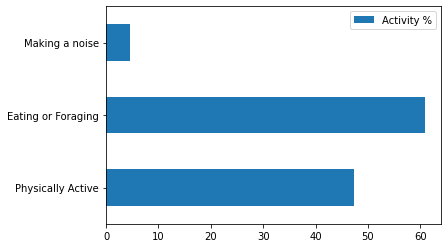

In [13]:
movement_chart = movement_df_transposed.plot(kind="barh")
